### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
train1= pd.read_excel('Data_Train.xlsx')
test1= pd.read_excel('Test_set.xlsx')
train= pd.concat([train1, test1])
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [3]:
train.shape

(13354, 11)

In [4]:
train.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [5]:
train.dropna(axis=0, inplace= True)
train.shape

(10682, 11)

In [6]:
train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [7]:
pwd

'/Users/kumargaurav/Documents/kaggle/flight price prediction'

### Exploratory Data Analysis

<AxesSubplot:>

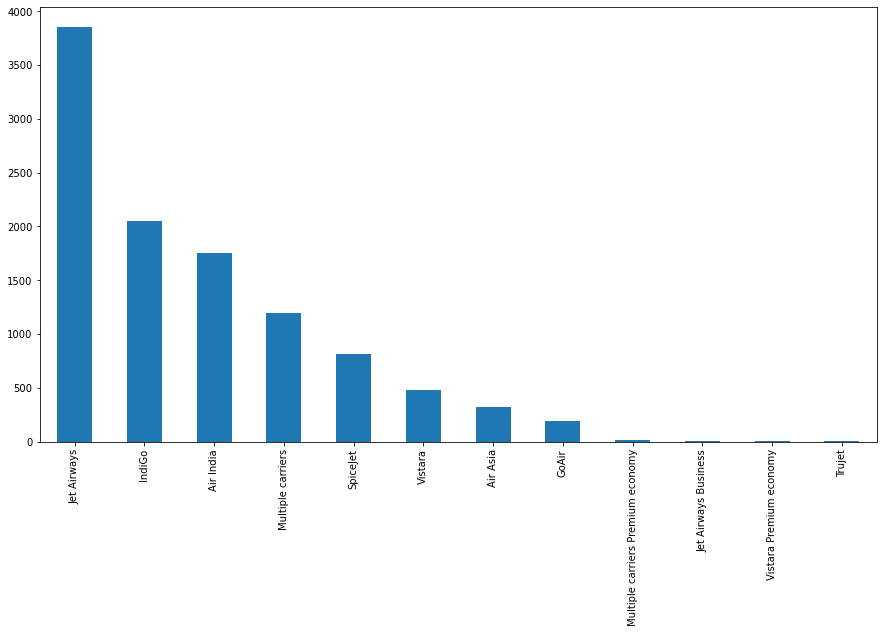

In [8]:
plt.figure(figsize=(15,8))
train['Airline'].value_counts().plot(kind= 'bar')

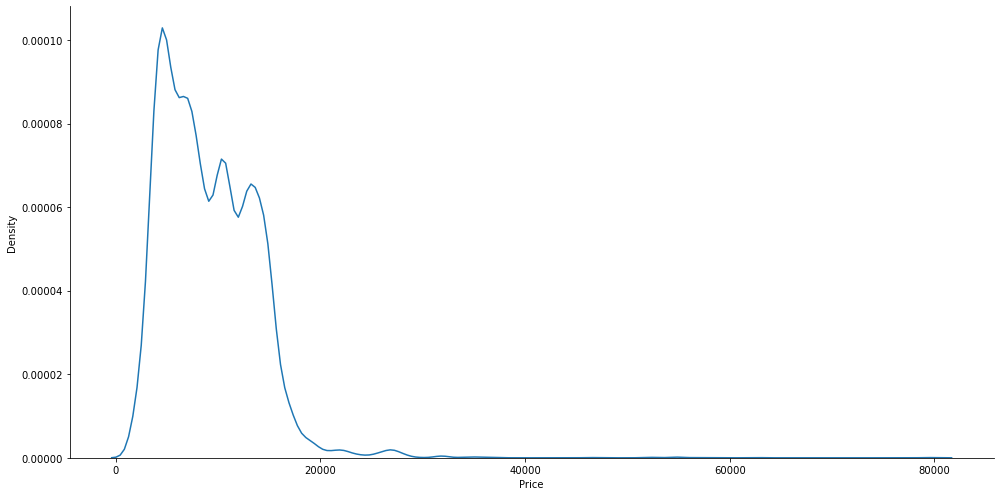

In [9]:
sns.set
sns.displot(data= train, x= 'Price', kind= 'kde', height=7, aspect=2)

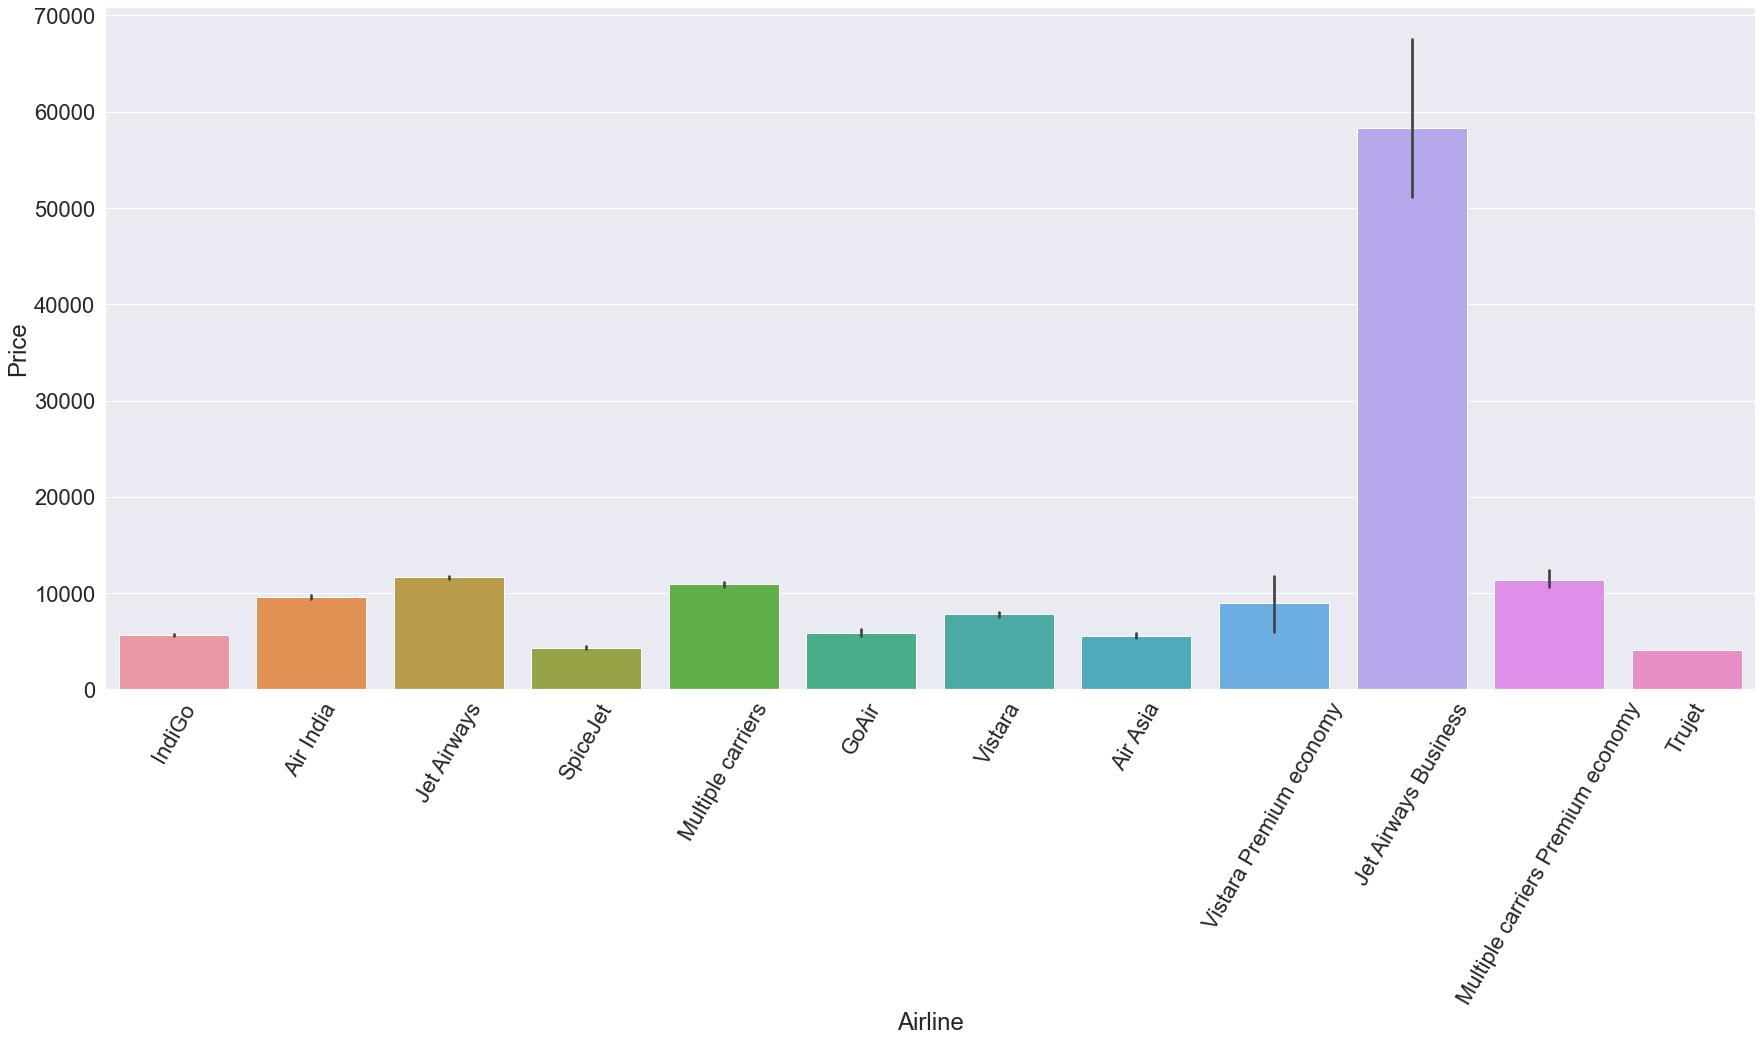

In [10]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.barplot(data= train, x='Airline', y='Price')
plt.xticks(rotation=60)
plt.tight_layout()

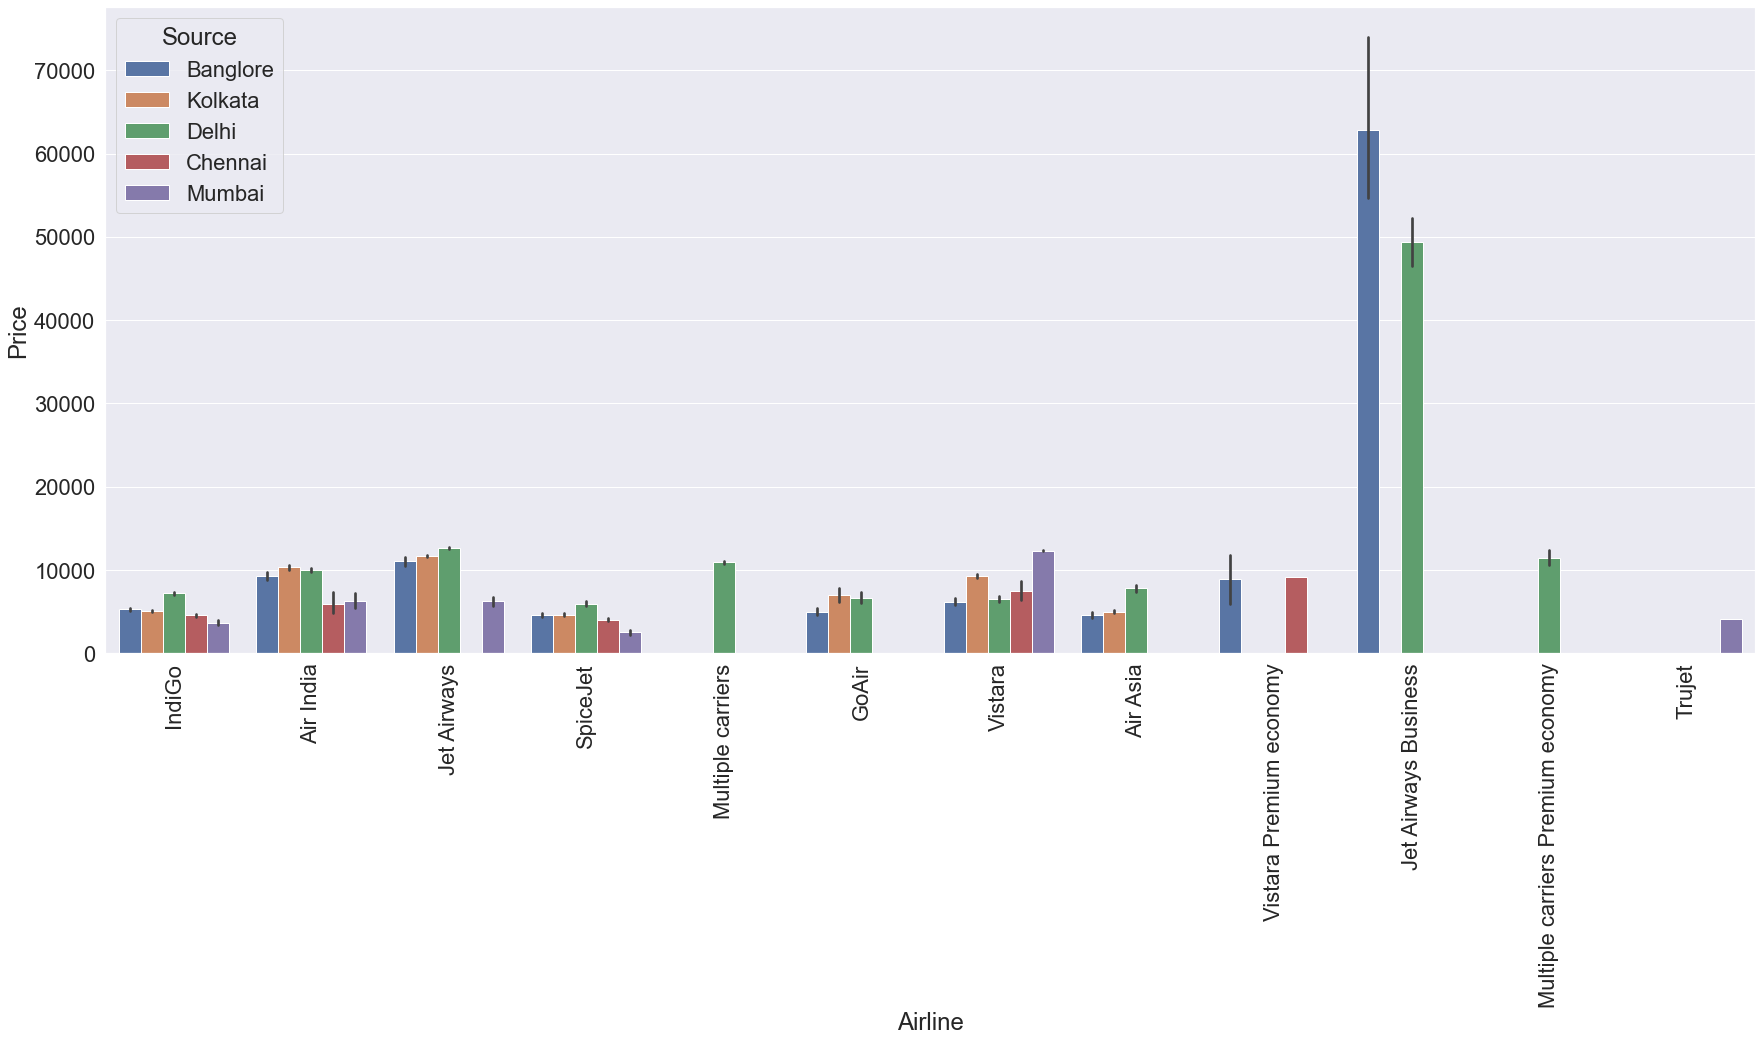

In [11]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.barplot(data= train, x='Airline', y='Price', hue= 'Source',)
plt.xticks(rotation=90)
plt.tight_layout()

### Source and Destination

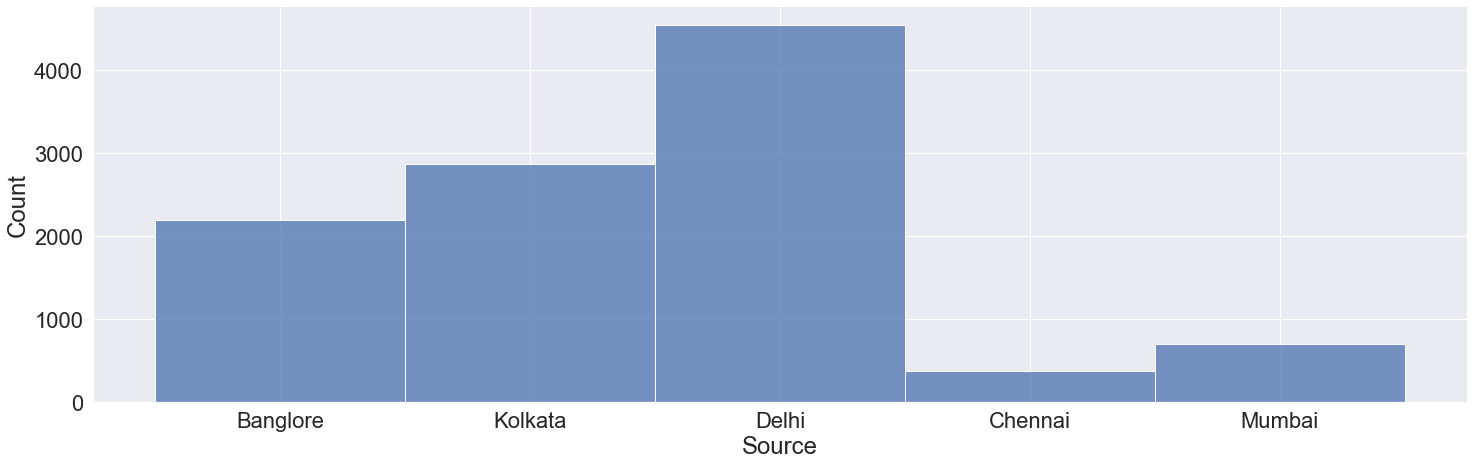

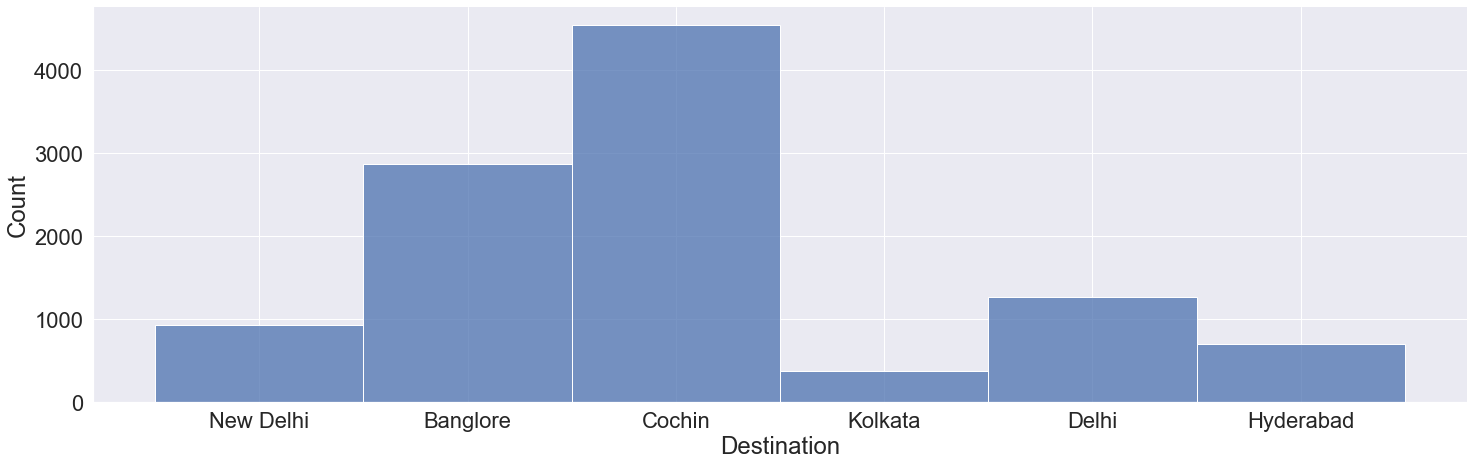

In [12]:
sns.color_palette()
#sns.set(color_palette("rocket"))
sns.displot(data= train, x='Source', height=7, aspect=3,)
sns.displot(data= train, x='Destination', height=7, aspect=3)

### If Prise>20000:
    Earlier we seen that only jet airways have prise more than 20000. So now we are going to plot source and prise and destination is hue

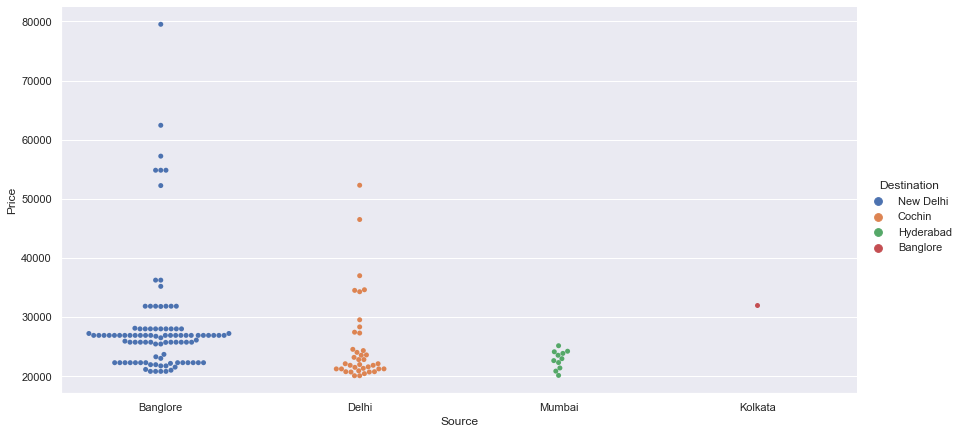

In [13]:
sns.set(font_scale=1)
df= train.loc[train['Price']>20000, ['Price', 'Destination', 'Source', 'Route', 'Total_Stops', 'Airline']]
sns.catplot(data= df, x='Source', y= 'Price', hue='Destination', kind= 'swarm', height=6, aspect=2)

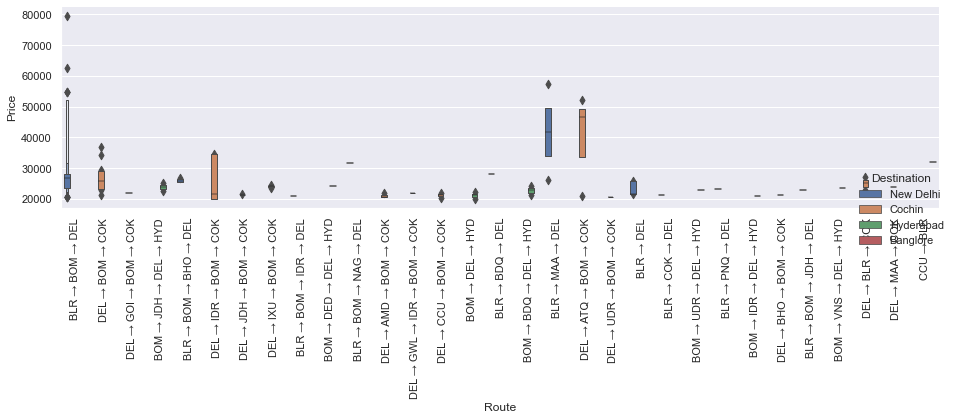

In [14]:
# When price is >20000
sns.catplot(data= df, x='Route', y= 'Price', hue='Destination', kind= 'boxen', height=6, aspect=2)
plt.xticks(rotation=90)
plt.tight_layout()

### If prise<20000

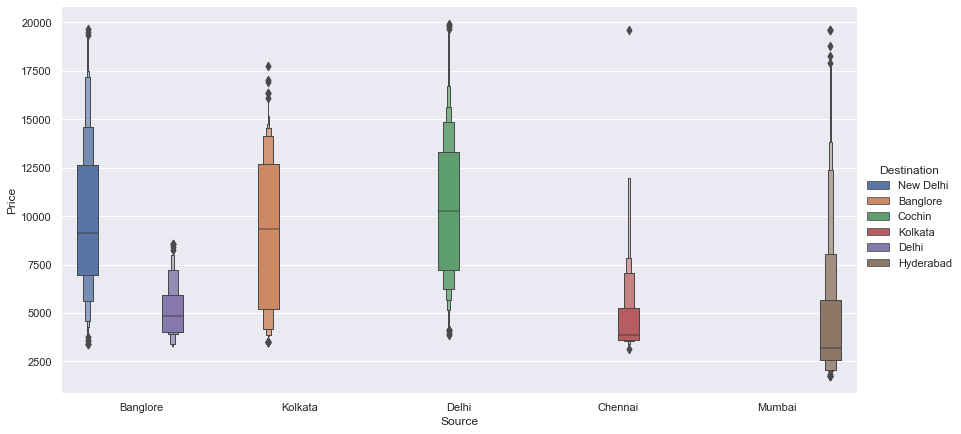

In [15]:
sns.set(font_scale=1)
df2= train.loc[train['Price']<20000, ['Price', 'Destination', 'Source', 'Route', 'Total_Stops', 'Airline']]
sns.catplot(data= df2, x='Source', y= 'Price', kind= 'boxen', hue='Destination', height=6, aspect=2)

<AxesSubplot:>

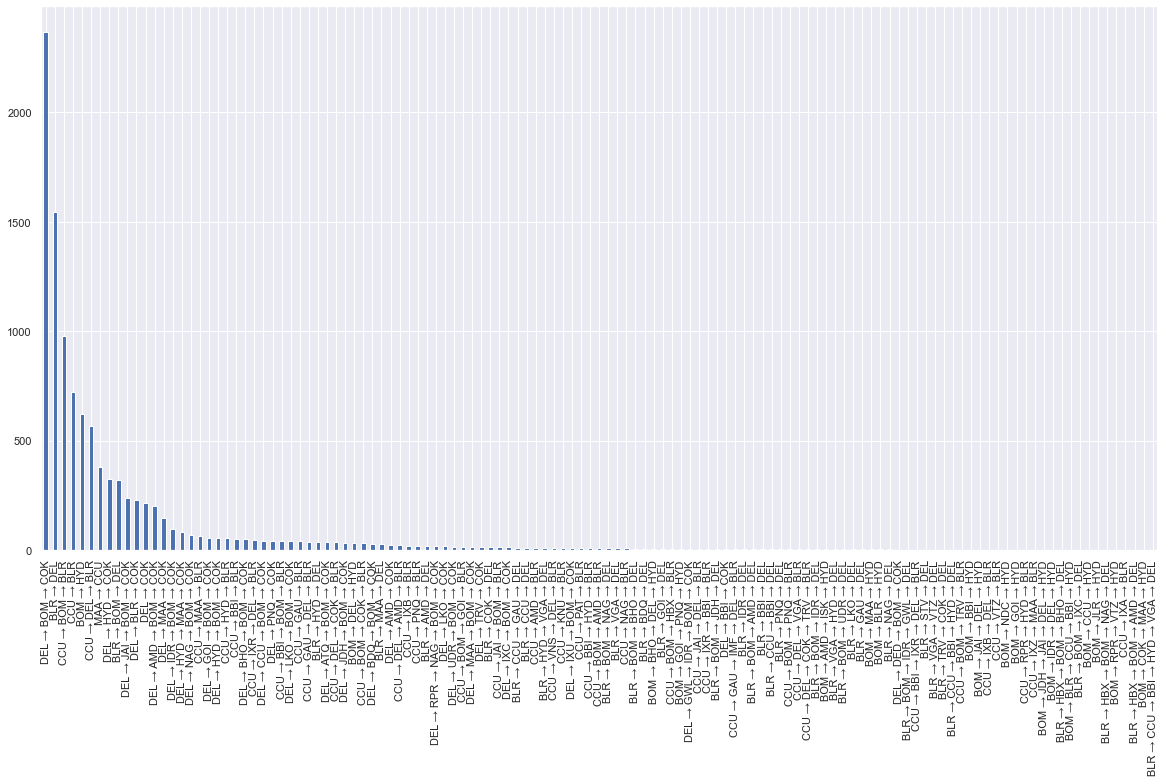

In [16]:
# When price is <20000
plt.figure(figsize=(20,10))
df2['Route'].value_counts().plot(kind='bar')

In [17]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

### 
    There is only one value in Total_Stops feature that have 4 Stops, So i am going to delete this row

In [18]:
df.loc[df['Total_Stops']=='4 stops'].index
#df.drop(index=9182, inplace= True)

Int64Index([], dtype='int64')

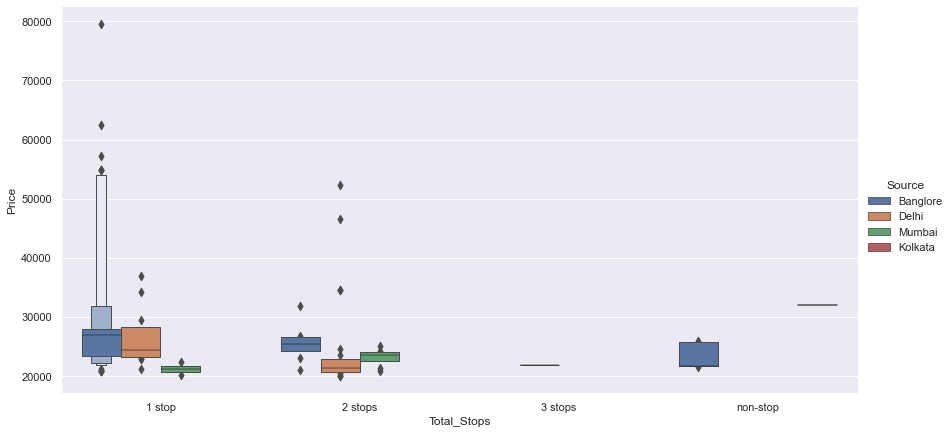

In [19]:
# When price is <20000
sns.catplot(data=df, x= 'Total_Stops', y= 'Price', kind= 'boxen', hue='Source', height=6, aspect=2)

### 
    Date_Of_Journey feature is object type, so converting it into timsetamp for more analysis.

In [22]:
train['Day'] = pd.to_datetime(train['Date_of_Journey'], format="%d/%m/%Y").dt.day
train['Month'] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [23]:
# Dropping Columns
train.drop('Date_of_Journey', axis=1, inplace= True)

In [24]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


#### Extracting hour and mintute of Dep_Time and Arrival_Time

In [25]:
# Dep_Time
train['Dep_Hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
train["Dep_Min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Arrival_Time
train['Arrival_Hour']= pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_Min']= pd.to_datetime(train['Arrival_Time']).dt.minute
#Dropping Dep_Time and Arrival_Time
train.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace= True)

In [26]:
# Take a Look
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,16,50,21,35


#### Let's see the busy hour of Departure:

<AxesSubplot:>

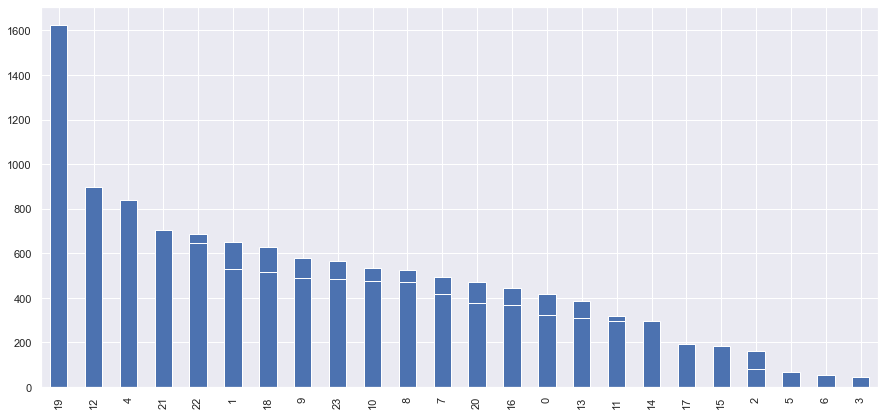

In [27]:
plt.figure(figsize=(15,7))
train['Dep_Hour'].value_counts().plot(kind= 'bar')
train['Arrival_Hour'].value_counts().plot(kind= 'bar')

### Encoding Categorical Feature

In [28]:
Airline= train['Airline']
Airline= pd.get_dummies(Airline, drop_first= True)
Source= train['Source']
Source= pd.get_dummies(Source, drop_first= True)
Destination= train['Destination']
Destination= pd.get_dummies(Destination, drop_first= True)

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
#Dropping features
train.drop(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Duration'], axis=1, inplace= True)
# Adding encoding feature to train
train= pd.concat([train,Airline, Source, Destination], axis=1)
train.head()

,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897.0,24,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,9,6,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,12,5,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,1,3,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Selecting Feature

In [29]:
#Romving Price from features
label= train.pop('Price')

<AxesSubplot:>

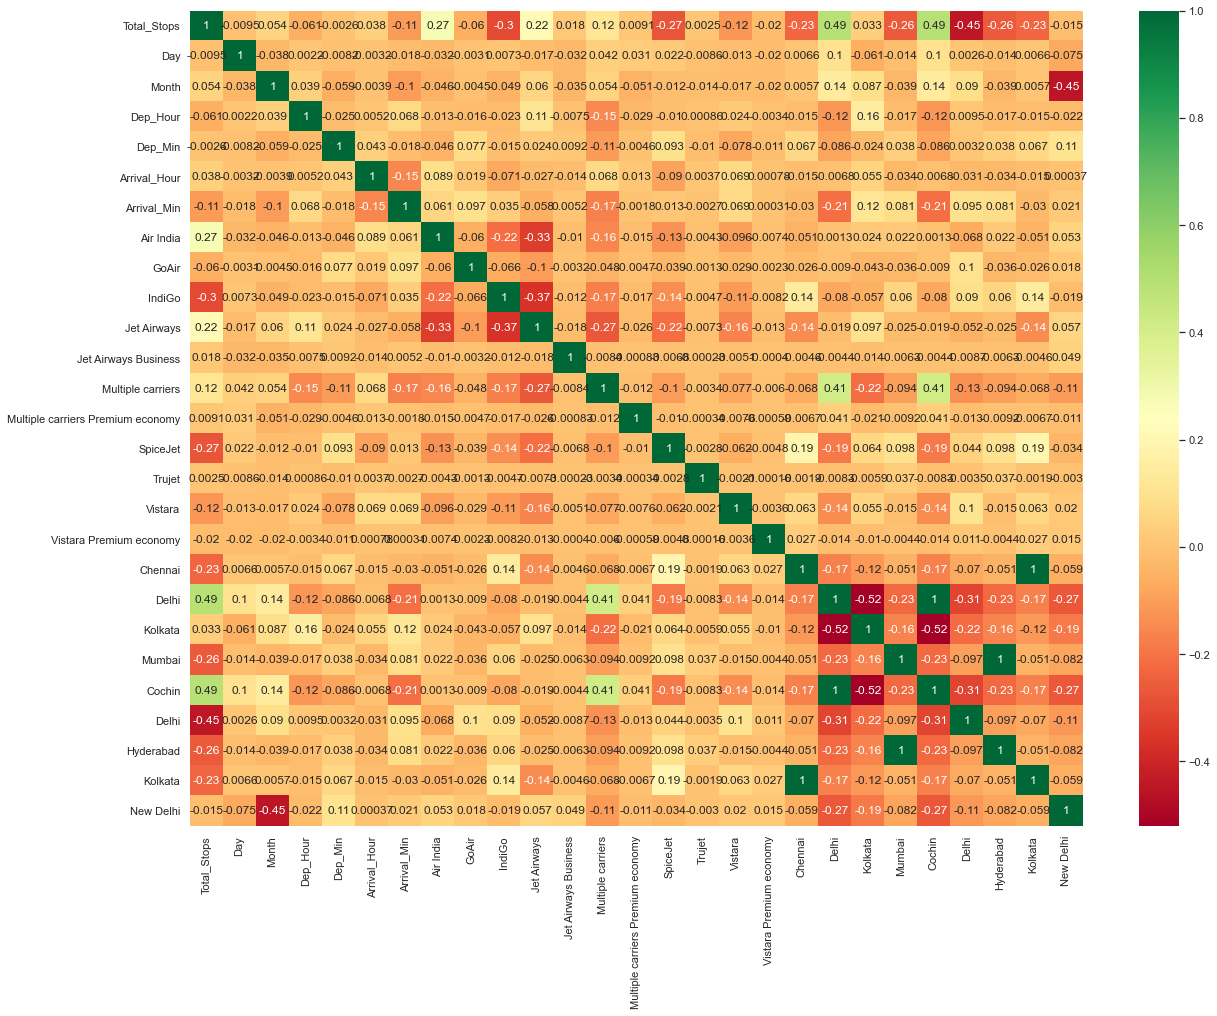

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot= True, cmap = "RdYlGn" )

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(train, label)
print(selection.feature_importances_)

[2.78618438e-01 1.42815900e-01 5.48237083e-02 3.97165698e-02
 3.09134607e-02 3.63283140e-02 2.63834278e-02 1.57792422e-02
 1.45579154e-03 1.78335317e-02 1.55376494e-01 6.76754742e-02
 1.83060954e-02 9.62209217e-04 3.51267513e-03 1.46391512e-04
 6.57050605e-03 1.03578369e-04 5.65151139e-04 1.35625679e-02
 3.12374847e-03 9.58904236e-03 1.96832444e-02 2.19465598e-02
 9.02902075e-03 6.42487446e-04 2.45363701e-02]


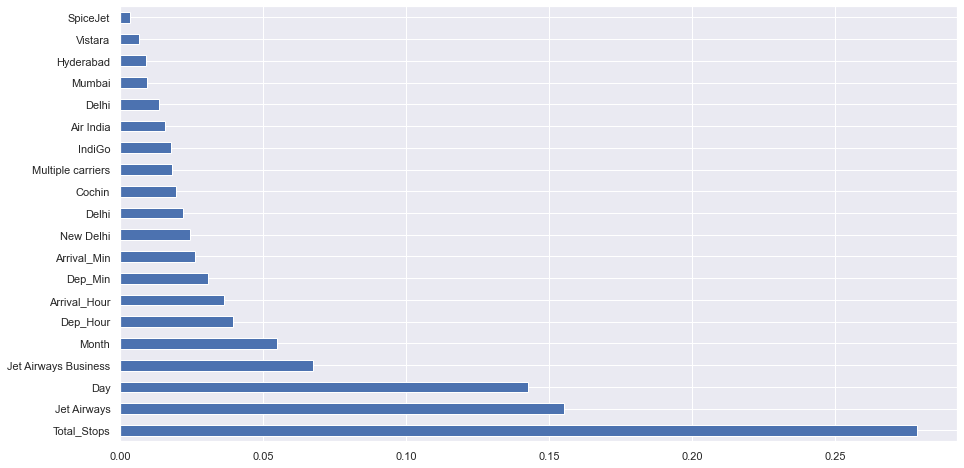

In [32]:
# Plotting Feature importance
plt.figure(figsize = (15,8))
feat_importances = pd.Series(selection.feature_importances_, index=train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Modeling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, random_state = 42)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Accuracy on Training Data: ', rf_model.score(X_train, y_train))
print('Accuracy on Testing Data: ', rf_model.score(X_test, y_test))

Accuracy on Training Data:  0.9524618102565279
Accuracy on Testing Data:  0.841889466664308


In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1144.3620429227092
MSE: 3409188.2252274505
RMSE: 1846.3987178362777


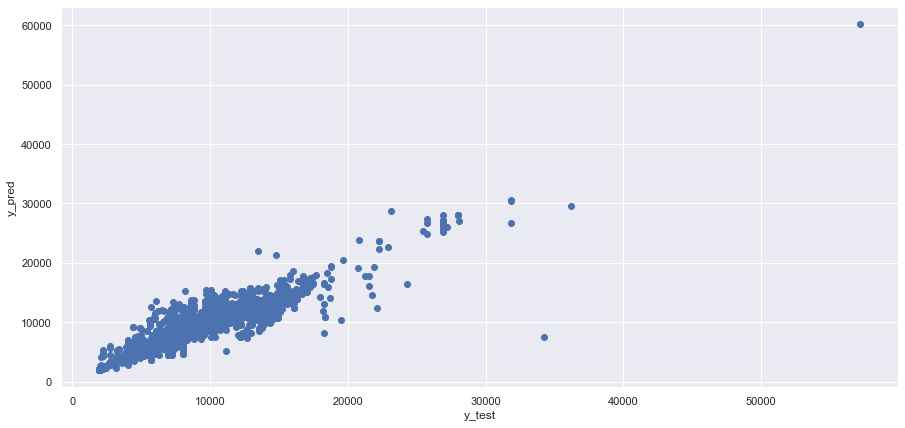

In [35]:
plt.figure(figsize= (15,7))
plt.scatter(y_test, y_pred,)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

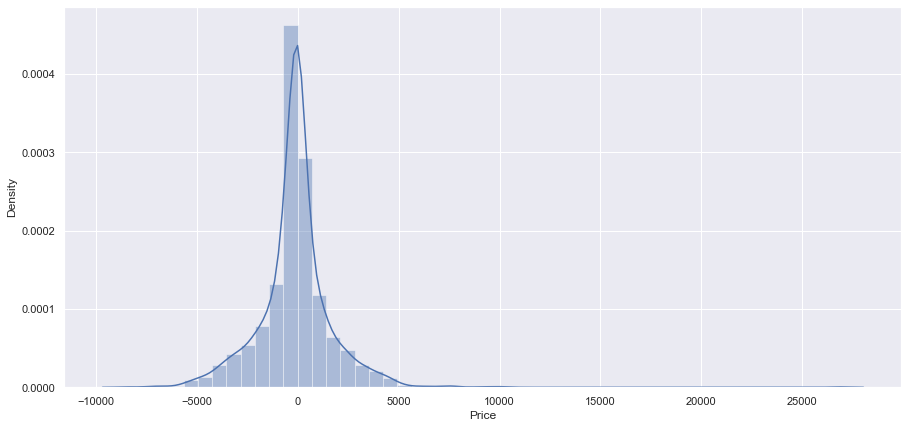

In [36]:
plt.figure(figsize= (15,7))
sns.distplot(y_test-y_pred)
plt.show()